No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


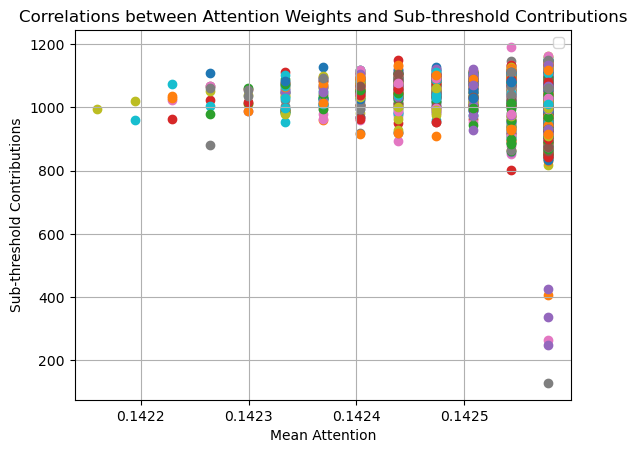

In [26]:
import json
import matplotlib.pyplot as plt
import os

# Define the directory where the correlations.json file is located
selected_directory = "/data/students/earl/llava-dissector/Qwen2_5_th_-1_5_p5_repeats/"
correlations_file = os.path.join(selected_directory, "correlations_th_-1_5.json")

# Check if the file exists in the specified directory
if not os.path.exists(correlations_file):
    raise FileNotFoundError(f"The file 'correlations.json' was not found in the directory: {selected_directory}")

# Load correlations from the file
with open(correlations_file, "r") as f:
    data = json.load(f)

# Plot correlations for each question
for entry in data:
    question_id = entry["question_id"]
    x = entry["mean_attention_weights"]
    y = entry["below_threshold_count"]
    plt.scatter(x, y)#, label=f"Question {question_id}")

plt.title("Correlations between Attention Weights and Sub-threshold Contributions")
plt.xlabel("Mean Attention")
plt.ylabel("Sub-threshold Contributions")
plt.legend()
#plt.ylim(0,20) # for paligemma
plt.grid(True)
plt.show()

# Qwen2.5 VL 7b

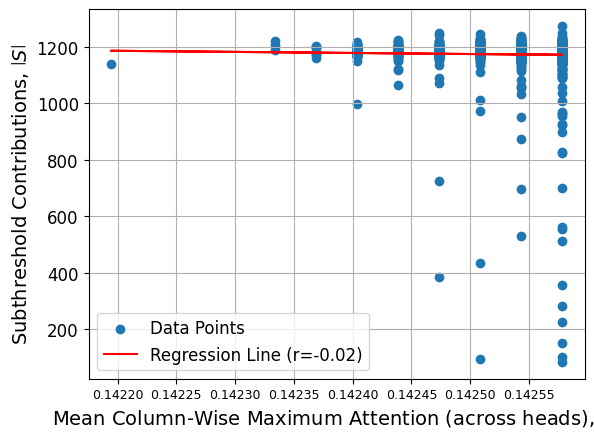

In [14]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np

# Define the directory where the correlations.json file is located
#selected_directory = "/data/students/earl/llava-dissector/Qwen2_5_th_-1_5_p5_repeats/"
#correlations_file = os.path.join(selected_directory, "correlations_th_-1_5.json")
#selected_directory = "/data/students/earl/llava-dissector/answers_qwen_loader/"
#selected_directory = "/data/students/earl/llava-dissector/answers_deepseek_loader/DeepSeek-VL2/"

selected_directory = "/data/students/earl/llava-dissector/answers_qwen_dissector/"
#selected_directory = "/data/students/earl/llava-dissector/answers_deepseek_dissector/DeepSeek-VL2/"
#selected_directory = "/data/students/earl/llava-dissector/answers_paligemma_dissector/"

correlations_file = os.path.join(selected_directory, "correlations.json")



# Check if the file exists in the specified directory
if not os.path.exists(correlations_file):
    raise FileNotFoundError(f"The file 'correlations.json' was not found in the directory: {selected_directory}")

# Load correlations from the file
with open(correlations_file, "r") as f:
    data = json.load(f)

# Extract x (mean_attention_weights) and y (below_threshold_count) values
x = [entry["mean_attention_weights"] for entry in data]
y = [entry["below_threshold_count"] for entry in data]

# Calculate the linear regression line
slope, intercept = np.polyfit(x, y, 1)
regression_line = [slope * xi + intercept for xi in x]

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(x, y)[0, 1]

# Plot the scatter plot and regression line
plt.scatter(x, y, label="Data Points")
plt.plot(x, regression_line, color="red", label=f"Regression Line (r={correlation_coefficient:.2f})")

# Add plot details
#plt.title("Correlations between Attention Weights and Sub-threshold Contributions")
plt.xlabel(r"Mean Column-Wise Maximum Attention (across heads), $m$", size=14)
plt.ylabel(r"Subthreshold Contributions, $\left|S\right|$", size=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tick_params(axis='x' , which='major', labelsize=9)
plt.tick_params(axis='y' , which='major', labelsize=12)    
plt.show()

# PaliGemma2 448

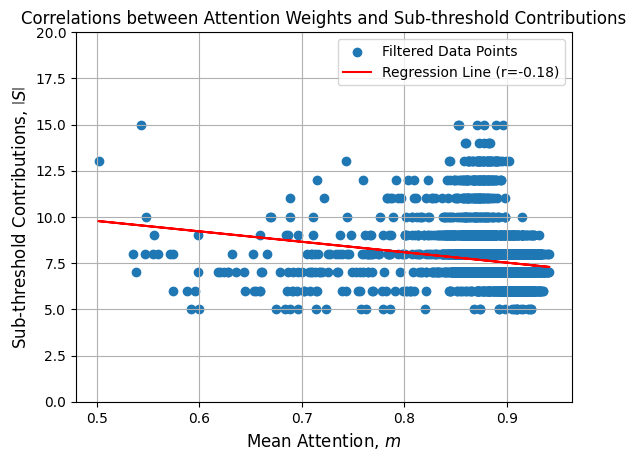

In [5]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np

# Define the directory where the correlations.json file is located
selected_directory = "/data/students/earl/llava-dissector/paligemma-448-th_-1_5_p5_repeats/"
correlations_file = os.path.join(selected_directory, "correlations.json")

# Check if the file exists in the specified directory
if not os.path.exists(correlations_file):
    raise FileNotFoundError(f"The file 'correlations.json' was not found in the directory: {selected_directory}")

# Load correlations from the file
with open(correlations_file, "r") as f:
    data = json.load(f)

# Extract x (mean_attention_weights) and y (below_threshold_count) values
x = [entry["mean_attention_weights"] for entry in data]
y = [entry["below_threshold_count"] for entry in data]

# Define the maximum y-value for filtering
max_y = 20  # This should match the value in plt.ylim

# Filter the data to exclude points where y > max_y
filtered_data = [(xi, yi) for xi, yi in zip(x, y) if yi <= max_y]
filtered_x, filtered_y = zip(*filtered_data)  # Unpack the filtered data

# Calculate the linear regression line using the filtered data
slope, intercept = np.polyfit(filtered_x, filtered_y, 1)
regression_line = [slope * xi + intercept for xi in filtered_x]

# Calculate the correlation coefficient using the filtered data
correlation_coefficient = np.corrcoef(filtered_x, filtered_y)[0, 1]

# Plot the scatter plot and regression line
plt.scatter(filtered_x, filtered_y, label="Filtered Data Points")
plt.plot(filtered_x, regression_line, color="red", label=f"Regression Line (r={correlation_coefficient:.2f})")

# Add plot details
plt.title("Correlations between Attention Weights and Sub-threshold Contributions")
plt.xlabel(r"Mean Attention, $m$", size=12)
plt.ylabel(r"Sub-threshold Contributions, $\left|S\right|$", size=12)
plt.legend()
plt.ylim(0, max_y)  # Set the y-limit
plt.grid(True)
plt.show()